Task 1:
x_mean = 3.0 y_mean = 4.2
w = 0.8 b = 1.7999999999999998
y_pred = [2.6 3.4 4.2 5.  5.8]


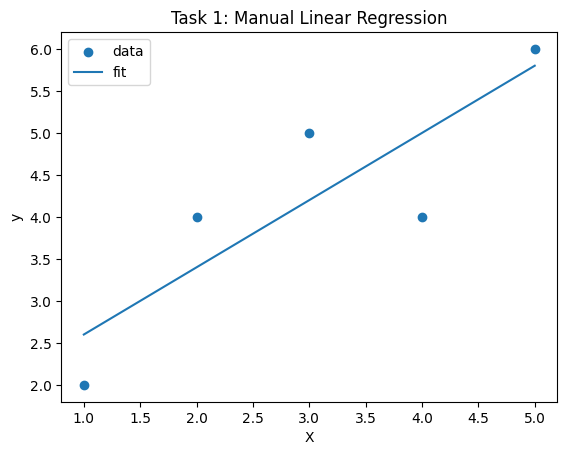


Task 2:
coef_ = [1.1]
intercept_ = 3.0
prediction for 60 = 69.0

Task 3:
MSE (sklearn) = 1.9999999999999942
MSE (manual)  = 1.9999999999999942

Task 4 (Diabetes dataset):
Train MSE = 2907.2577640101085
Test  MSE = 2848.3106508475053

Task 5:
LinearRegression | Train MSE: 2907.2578 | Test MSE: 2848.3107
Ridge(alpha=0.1) | Train MSE: 2953.4072 | Test MSE: 2810.0386
Ridge(alpha=10)  | Train MSE: 5132.9822 | Test MSE: 4664.7173


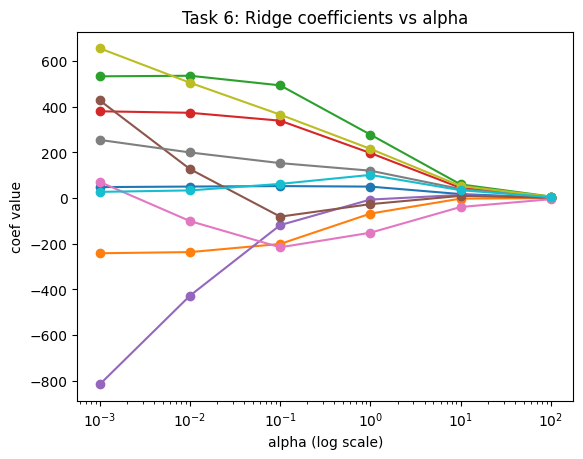


Task 7:
Linear  | Train MSE: 0.23366081922810944 | Test MSE: 0.21397141184623186
Ridge   | Train MSE: 0.30215853211009847 | Test MSE: 0.2586645436465396
||coef|| (L2 norm):
Linear: 3.6962659654741636
Ridge : 1.76581873177285

Task 8:
Degree= 1 | Linear  Train MSE=0.2383 Test MSE=0.1795 | Ridge Train MSE=0.2383 Test MSE=0.1801
Degree= 5 | Linear  Train MSE=0.0564 Test MSE=0.0428 | Ridge Train MSE=0.0590 Test MSE=0.0453
Degree=10 | Linear  Train MSE=0.0547 Test MSE=0.0486 | Ridge Train MSE=0.0571 Test MSE=0.0442


/usr/local/lib/python3.12/dist-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=4.8689e-17): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)


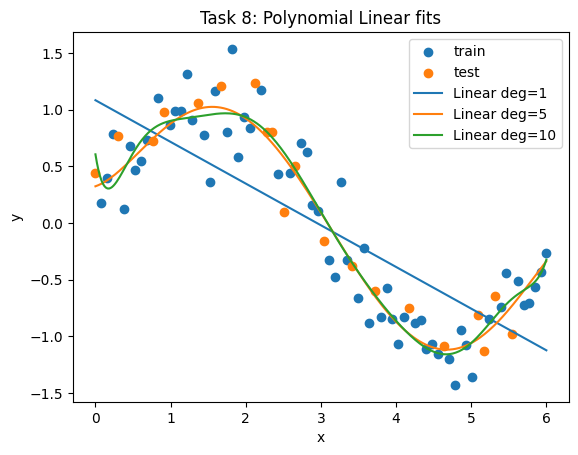

/usr/local/lib/python3.12/dist-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=4.8689e-17): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)


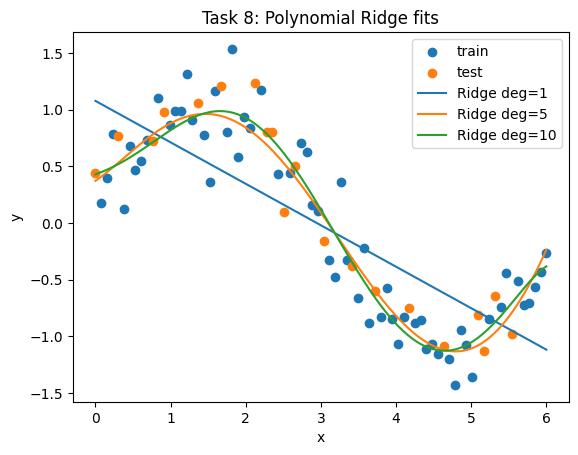


Task 9 (Ridge from scratch):
Train MSE = 3321.972295010769
Test  MSE = 3002.3342464448847
w shape = (10, 1) b = 154.3444108761328


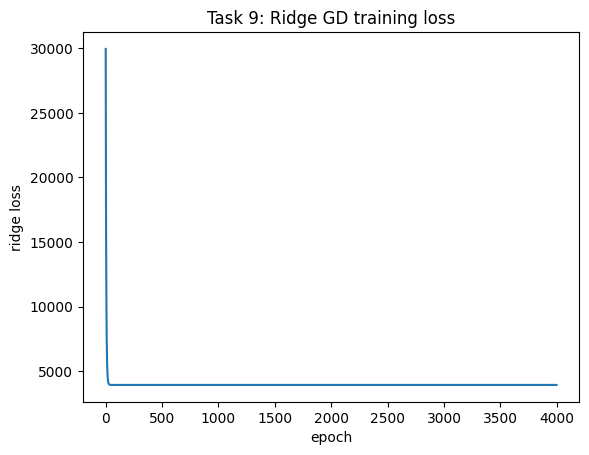

In [1]:

import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# ✅ I. BEGINNER
# -----------------------------

# 🟢 Task 1. Simple linear regression (manual)
X = np.array([1, 2, 3, 4, 5], dtype=float)
y = np.array([2, 4, 5, 4, 6], dtype=float)

x_mean = X.mean()
y_mean = y.mean()

w = np.sum((X - x_mean) * (y - y_mean)) / np.sum((X - x_mean) ** 2)
b = y_mean - w * x_mean

y_pred = w * X + b

print("Task 1:")
print("x_mean =", x_mean, "y_mean =", y_mean)
print("w =", w, "b =", b)
print("y_pred =", y_pred)

plt.figure()
plt.scatter(X, y, label="data")
plt.plot(X, y_pred, label="fit")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("Task 1: Manual Linear Regression")
plt.show()


# 🟢 Task 2. Scikit-learn Linear Regression
from sklearn.linear_model import LinearRegression

X2 = np.array([[10], [20], [30], [40], [50]], dtype=float)
y2 = np.array([15, 25, 35, 45, 60], dtype=float)

lr = LinearRegression()
lr.fit(X2, y2)

print("\nTask 2:")
print("coef_ =", lr.coef_)
print("intercept_ =", lr.intercept_)
pred_60 = lr.predict(np.array([[60.0]]))[0]
print("prediction for 60 =", pred_60)


# 🟢 Task 3. MSE: sklearn vs manual
from sklearn.metrics import mean_squared_error

y2_pred = lr.predict(X2)
mse_sklearn = mean_squared_error(y2, y2_pred)
mse_manual = np.mean((y2 - y2_pred) ** 2)

print("\nTask 3:")
print("MSE (sklearn) =", mse_sklearn)
print("MSE (manual)  =", mse_manual)


# -----------------------------
# ✅ II. INTERMEDIATE
# -----------------------------

# 🟡 Task 4. Train/Test split + Linear Regression + MSE compare
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

data = load_diabetes()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

lr = LinearRegression()
lr.fit(X_train, y_train)

train_pred = lr.predict(X_train)
test_pred = lr.predict(X_test)

train_mse = mean_squared_error(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)

print("\nTask 4 (Diabetes dataset):")
print("Train MSE =", train_mse)
print("Test  MSE =", test_mse)


# 🟡 Task 5. Ridge compare (alpha=0.1, 10) vs Linear
from sklearn.linear_model import Ridge

models = {
    "LinearRegression": LinearRegression(),
    "Ridge(alpha=0.1)": Ridge(alpha=0.1),
    "Ridge(alpha=10)": Ridge(alpha=10),
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    tr = mean_squared_error(y_train, model.predict(X_train))
    te = mean_squared_error(y_test, model.predict(X_test))
    results[name] = {"Train MSE": tr, "Test MSE": te}

print("\nTask 5:")
for name, r in results.items():
    print(f"{name:16s} | Train MSE: {r['Train MSE']:.4f} | Test MSE: {r['Test MSE']:.4f}")

# Overfitting hint: if Train MSE very low but Test MSE much higher → more overfitting.


# 🟡 Task 6. Alpha effect on coef + plot
alphas = [0.001, 0.01, 0.1, 1, 10, 100]
coefs = []

for a in alphas:
    m = Ridge(alpha=a)
    m.fit(X_train, y_train)
    coefs.append(m.coef_)

coefs = np.array(coefs)  # shape: (len(alphas), n_features)

plt.figure()
for j in range(coefs.shape[1]):
    plt.plot(alphas, coefs[:, j], marker="o")
plt.xscale("log")
plt.xlabel("alpha (log scale)")
plt.ylabel("coef value")
plt.title("Task 6: Ridge coefficients vs alpha")
plt.show()


# -----------------------------
# ✅ III. ADVANCED
# -----------------------------

# 🔴 Task 7. Many correlated features: Linear vs Ridge stability
np.random.seed(42)
n = 400
k_latent = 3
n_features = 10

Z = np.random.randn(n, k_latent)                 # latent factors
A = np.random.randn(k_latent, n_features)        # mixing matrix
X = Z @ A + 0.1 * np.random.randn(n, n_features) # correlated features

true_w = np.random.randn(n_features)
y = X @ true_w + 0.5 * np.random.randn(n)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

lin = LinearRegression().fit(X_train, y_train)
rid = Ridge(alpha=10).fit(X_train, y_train)

print("\nTask 7:")
print("Linear  | Train MSE:", mean_squared_error(y_train, lin.predict(X_train)),
      "| Test MSE:", mean_squared_error(y_test, lin.predict(X_test)))
print("Ridge   | Train MSE:", mean_squared_error(y_train, rid.predict(X_train)),
      "| Test MSE:", mean_squared_error(y_test, rid.predict(X_test)))

print("||coef|| (L2 norm):")
print("Linear:", np.linalg.norm(lin.coef_))
print("Ridge :", np.linalg.norm(rid.coef_))


# 🔴 Task 8. Overfitting demo with PolynomialFeatures (degree=1,5,10) + Linear vs Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

np.random.seed(0)
n = 80
X = np.linspace(0, 6, n).reshape(-1, 1)
y = np.sin(X).ravel() + 0.25 * np.random.randn(n)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

degrees = [1, 5, 10]

print("\nTask 8:")
for d in degrees:
    lin_poly = Pipeline([
        ("poly", PolynomialFeatures(degree=d, include_bias=False)),
        ("model", LinearRegression())
    ])
    rid_poly = Pipeline([
        ("poly", PolynomialFeatures(degree=d, include_bias=False)),
        ("model", Ridge(alpha=1.0))
    ])

    lin_poly.fit(X_train, y_train)
    rid_poly.fit(X_train, y_train)

    lin_tr = mean_squared_error(y_train, lin_poly.predict(X_train))
    lin_te = mean_squared_error(y_test, lin_poly.predict(X_test))
    rid_tr = mean_squared_error(y_train, rid_poly.predict(X_train))
    rid_te = mean_squared_error(y_test, rid_poly.predict(X_test))

    print(f"Degree={d:2d} | Linear  Train MSE={lin_tr:.4f} Test MSE={lin_te:.4f} "
          f"| Ridge Train MSE={rid_tr:.4f} Test MSE={rid_te:.4f}")

# visualize fits
xx = np.linspace(0, 6, 300).reshape(-1, 1)
plt.figure()
plt.scatter(X_train, y_train, label="train")
plt.scatter(X_test, y_test, label="test")

for d in degrees:
    lin_poly = Pipeline([
        ("poly", PolynomialFeatures(degree=d, include_bias=False)),
        ("model", LinearRegression())
    ])
    lin_poly.fit(X_train, y_train)
    plt.plot(xx, lin_poly.predict(xx), label=f"Linear deg={d}")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Task 8: Polynomial Linear fits")
plt.legend()
plt.show()

plt.figure()
plt.scatter(X_train, y_train, label="train")
plt.scatter(X_test, y_test, label="test")

for d in degrees:
    rid_poly = Pipeline([
        ("poly", PolynomialFeatures(degree=d, include_bias=False)),
        ("model", Ridge(alpha=1.0))
    ])
    rid_poly.fit(X_train, y_train)
    plt.plot(xx, rid_poly.predict(xx), label=f"Ridge deg={d}")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Task 8: Polynomial Ridge fits")
plt.legend()
plt.show()


# 🔴 Task 9. Ridge from scratch (NumPy + Gradient Descent), no sklearn, no ready optimizer
# Ridge objective:
#   J(w,b) = (1/n) * ||y - (Xw + b)||^2 + alpha * ||w||^2
# Updates (batch GD):
#   dw = (-2/n) X^T (y - yhat) + 2*alpha*w
#   db = (-2/n) sum(y - yhat)
def standardize_train_test(X_train, X_test):
    mu = X_train.mean(axis=0, keepdims=True)
    sigma = X_train.std(axis=0, keepdims=True) + 1e-12
    return (X_train - mu) / sigma, (X_test - mu) / sigma, mu, sigma

def ridge_gd_fit(X, y, alpha=1.0, lr=0.05, epochs=3000, verbose=False):
    X = X.astype(float)
    y = y.astype(float).reshape(-1, 1)
    n, d = X.shape

    w = np.zeros((d, 1))
    b = 0.0

    losses = []
    for t in range(epochs):
        yhat = X @ w + b
        err = y - yhat

        dw = (-2.0 / n) * (X.T @ err) + 2.0 * alpha * w
        db = (-2.0 / n) * float(np.sum(err))

        w -= lr * dw
        b -= lr * db

        loss = (1.0 / n) * float(np.sum(err ** 2)) + alpha * float(np.sum(w ** 2))
        losses.append(loss)

        if verbose and (t % 500 == 0 or t == epochs - 1):
            print(f"epoch={t:4d} loss={loss:.6f}")

    return w, b, np.array(losses)

def ridge_gd_predict(X, w, b):
    return (X @ w + b).ravel()

# demo on diabetes data (same split as Task 4/5)
X = load_diabetes().data
y = load_diabetes().target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

X_train_s, X_test_s, mu, sigma = standardize_train_test(X_train, X_test)

w_gd, b_gd, losses = ridge_gd_fit(
    X_train_s, y_train, alpha=1.0, lr=0.05, epochs=4000, verbose=False
)

pred_train = ridge_gd_predict(X_train_s, w_gd, b_gd)
pred_test = ridge_gd_predict(X_test_s, w_gd, b_gd)

print("\nTask 9 (Ridge from scratch):")
print("Train MSE =", np.mean((y_train - pred_train) ** 2))
print("Test  MSE =", np.mean((y_test - pred_test) ** 2))
print("w shape =", w_gd.shape, "b =", b_gd)

plt.figure()
plt.plot(losses)
plt.xlabel("epoch")
plt.ylabel("ridge loss")
plt.title("Task 9: Ridge GD training loss")
plt.show()